# CNN-lytical Assignment-1
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training can be found [here](https://drive.google.com/file/d/1z7lwIml6UxsNpDIW3_mPPEb8SoaPC5Zg/view)

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [5]:


import numpy as np
import pickle
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
import math



## Load *Dataset*
Load data from the given pickle file

In [1]:
# mount Google Drive to access the dataset

from google.colab import drive
drive.mount('/content/gdrive')

# load the data set

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import pandas as pd

var=pd.read_pickle('train_data.pkl')
Y_dataset=var['y']
X_dataset=var['X']
print(X_dataset.shape)

# normalize

from sklearn import preprocessing

X_dataset = preprocessing.normalize(X_dataset)

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.3, shuffle=False)


Mounted at /content/gdrive


Saving train_data.pkl to train_data.pkl
User uploaded file "train_data.pkl" with length 47100223 bytes
(60000, 784)


In [ ]:
pip install sklearn

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split

var=pd.read_pickle('train_data.pkl')
Y_dataset=var['y']
X_dataset=var['X']

X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.3, shuffle=False)
print("X_train values :")
print(X_train)
print("X_test values :")
print(X_test)
print("y_train values :")
print(y_train)
print("y_test values :")
print(y_test)
'''



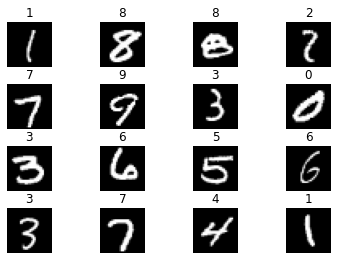

In [6]:


for i in range(16):
    plt.subplot(4,4,i+1)
    index=random.randrange(0,60000)
    image = X_dataset[index]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(Y_dataset[index][0])
    plt.axis('off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()




## Building up parts of our classifier

**Activation functions**

In [7]:
from numpy.lib import npyio

def relu(Z):
    return np.maximum(0,Z)

def softmax(z):
    
    reduced=z-np.max(z, axis=1,keepdims=True)
    exponentiated=np.exp(reduced)
    denominator=np.sum(exponentiated,axis=1,keepdims=True)
    return exponentiated/denominator

  

**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [8]:
  def init_params(nn_architecture):
      """
      ideally it should take the size of all the layers and 
      should return the initialized weights.
      """
      number_of_layers = len(nn_architecture)	
      params_values = {}

      for idx, layer in enumerate(nn_architecture):	 								
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn( layer_input_size, layer_output_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(layer_output_size, 1) * 0.1
      

      print(params_values["W1"].shape)
        
      return params_values
    
  

In [ ]:
# init_params([
#     {"input_dim": 784, "output_dim": 256, "activation": "relu"},
#     {"input_dim": 256, "output_dim": 10, "activation": "relu"},
#     ])

**Forward Propagation**

In [17]:
def forward_propg(X, parameters):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
  
    z1 = np.dot(X,W1) + b1.T
    a1 = relu(z1)
    z2 = np.dot(a1,W2) + b2.T
    a2 = relu(z2)
    a2 = softmax(a2)#probability bw 0 and 1-- logits
    
    
    cache = [ W1, b1, W2, b2,a1,a2]
    
    return a2, cache
    


**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [10]:
    '''
    def backward_propg(weights, X, y, cache,learning_rate=1e-5):
    """
    should update the weights and return updated weights
    """

    '''
def back_propagate(W1, b1, W2, b2, cache,X,y,learning_rate):
   
    # Retrieve also A1 and A2 from dictionary "cache"
    
      a1 = cache[4]

      a2 = cache[5]
  
    # Backward propagation: calculate dW1, db1, dW2, db2.
      N = np.size(a2,0) 
      a2 = a2/N
      for i in range(N):
        a2[i][y[i]] -= 1/N
      db2=np.sum(a2,axis=0,keepdims=True).T
      dW2=a1.T@a2
      da1= a2@W2.T
      grad_relu= da1*(a1>0)
      db1 = np.sum(grad_relu,axis=0,keepdims=True).T
      dW1 = X.T@grad_relu
    
    
    # Updating the parameters according to algorithm
      W1 = W1 - learning_rate * dW1
      b1 = b1 - learning_rate * db1
      W2 = W2 - learning_rate * dW2
      b2 = b2 - learning_rate * db2
  
      weights = {}
      weights["W1"]=W1
      weights["b1"]=b1
      weights["W2"]=W2
      weights["b2"]=b2

      return weights
    

In [11]:
def cost_func(Y_dataset,a2):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
     
    cost=0
    for i in range(np.size(a2,0)):
        cost += -np.log(a2[i][Y_dataset[i]])/(np.size(a2,0))
    
    return cost
    
  
    


## Integrate everything

In [16]:
def train(X, y, hidden_nodes, epochs=1000, learning_rate=1):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    nn_architecture = [
    {"input_dim": 784, "output_dim": 256, "activation": "relu"},
    {"input_dim": 256, "output_dim": 10, "activation": "relu"},
    ]
    weights = init_params(nn_architecture)
    
       
    for i in range(epochs):
        # forward propagation
        Y_hat, cashe = forward_propg(X,weights)

        # print cost at every 100 or so iterations
        


        if(i%100 == 0):
          print(("cost after {} iterations is: ".format(i),cost_func(y,Y_hat)))
        
        # backward propagation
        weights = back_propagate(weights["W1"],weights["b1"],weights["W2"],weights["b2"], cashe,X,y,learning_rate )

  
        
    return weights
        

In [13]:
from re import M
def predict(X, updated_weights):
    """
    returns the prediction in [0,9] for each element in X
    """
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    output=forward_propg(X,updated_weights)[0]
    max_elements=np.max(output,axis=1,keepdims=True)

    for i in range(output.shape[0]):
      for j in range(output.shape[1]):
          if output[i][j]==max_elements[i]:
               Y_prediction[i]=j
               break
    

    return Y_prediction

In [14]:
def accuracy(predictions, y):
    """
    prints % accuracy
    """
    return np.mean(predictions==y)*100

### Save as pickle

In [ ]:
import pickle
import random
from google.colab import files

roll_num = "210050007" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension
weights = train(X_train,y_train,256,learning_rate=1)
model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': weights[0],# layer 0 weight (784, z)
    'layer_0_bias': weights[1] , # layer 0 bias (z, 1)
    'layer_1_wt': weights[2], # layer 1 weight (z, 10)
    'layer_1_bias': weights[3] # layer 1 bias (10, 1)
}



with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)
    files.download(f'model_{roll_num}.pkl') # download the file from the Colab session for submission

(784, 256)
('cost after 0 iterations is: ', array([2.31357119]))
('cost after 10 iterations is: ', array([2.01238914]))
('cost after 20 iterations is: ', array([1.65246071]))
('cost after 30 iterations is: ', array([1.27396596]))
('cost after 40 iterations is: ', array([0.99180183]))
('cost after 50 iterations is: ', array([0.8154863]))
('cost after 60 iterations is: ', array([0.70435908]))
('cost after 70 iterations is: ', array([0.62962969]))
('cost after 80 iterations is: ', array([0.5761909]))
('cost after 90 iterations is: ', array([0.53610727]))
('cost after 100 iterations is: ', array([0.5049558]))
('cost after 110 iterations is: ', array([0.48006589]))
('cost after 120 iterations is: ', array([0.45974287]))
('cost after 130 iterations is: ', array([0.44284682]))
('cost after 140 iterations is: ', array([0.42857527]))
('cost after 150 iterations is: ', array([0.41635599]))
('cost after 160 iterations is: ', array([0.40577394]))
('cost after 170 iterations is: ', array([0.3965126

KeyboardInterrupt: ignored

In [18]:


weights=train(X_train,y_train,256,learning_rate=1)
print(accuracy(predict(X_test,weights),y_test))



(784, 256)
('cost after 0 iterations is: ', array([2.30346529]))
('cost after 100 iterations is: ', array([0.4928307]))
('cost after 200 iterations is: ', array([0.37200008]))
('cost after 300 iterations is: ', array([0.33162074]))
('cost after 400 iterations is: ', array([0.30859048]))
('cost after 500 iterations is: ', array([0.29240052]))
('cost after 600 iterations is: ', array([0.27957343]))
('cost after 700 iterations is: ', array([0.26837033]))
('cost after 800 iterations is: ', array([0.25816322]))
('cost after 900 iterations is: ', array([0.24855659]))
92.56666666666666
